In [1]:
import numpy as np
import matplotlib.pyplot as plt

from qiskit.circuit import QuantumCircuit, ParameterVector
from qiskit.quantum_info import SparsePauliOp
from qiskit.primitives import Estimator
from qiskit_algorithms.gradients import ParamShiftEstimatorGradient

from algo.utils import (
    tfim_hamiltonian,
    circuit_HVA_TIFM,
    expectation_loss_grad
)

cite: Exploring Entanglement and Optimization within the Hamiltonian Variational
Ansatz

## Transverse-field Ising model

The TFIM is a paradigmatic model for studies of quantum magnetism. The Hamiltonian for the 1 D chain is
given by

$$
H_{\mathrm{TFIM}}=-\sum_{i=1}^N\left[\sigma_i^z \sigma_{i+1}^z+g \sigma_i^x\right]=H_{z z}+g H_x,
$$

with $H_{z z}=-\sum_{i=1}^N \sigma_i^z \sigma_{i+1}^z$ and $H_x=-\sum_{i=1}^N \sigma_i^x$, where we assume that $g>0$ and use periodic boundary conditions $\sigma_{N+1}^z \equiv \sigma_1^z$. Here, $\sigma_i^\alpha$ corresponds to a Pauli matrix $\alpha=x, y, z$ acting on a site $i$, where the Pauli matrices are defined as follows:

$$
\sigma_x \equiv\left(\begin{array}{ll}
0 & 1 \\
1 & 0
\end{array}\right), \quad \sigma_y \equiv\left(\begin{array}{cc}
0 & -i \\
i & 0
\end{array}\right), \quad \sigma_z \equiv\left(\begin{array}{cc}
1 & 0 \\
0 & -1
\end{array}\right) .
$$


In [2]:
# 使用示例
tfim_op = tfim_hamiltonian(num_q=4, J=-1.0, g=-0.5, bc='periodic')
print(tfim_op)

SparsePauliOp(['ZZII', 'IZZI', 'IIZZ', 'ZIIZ', 'XIII', 'IXII', 'IIXI', 'IIIX'],
              coeffs=[-1. +0.j, -1. +0.j, -1. +0.j, -1. +0.j, -0.5+0.j, -0.5+0.j, -0.5+0.j,
 -0.5+0.j])


An efficient implementation is given below.

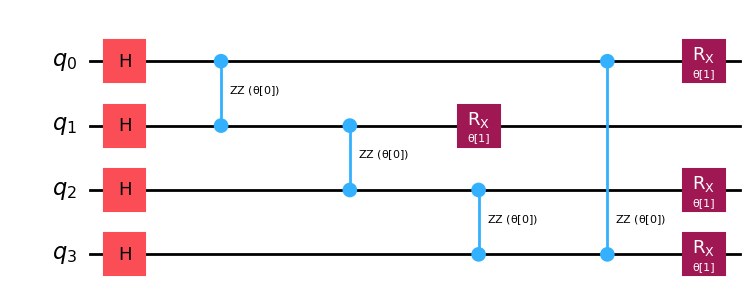

In [3]:
# 示例：4 比特，1 层，示例权重
num_q, layer = 4, 1
qc, _ = circuit_HVA_TIFM(num_q, layer)
qc.draw(output='mpl')

In [4]:

# # 示例：4 比特，1 层，示例权重
# num_q, layer = 4, 2
# num_p = layer * 2 

# weights = np.random.uniform(0, 2*np.pi, size=num_p)

# expval = expectation_loss_grad(num_q,
#                                layer,
#                                weights,
#                                circuit=circuit_HVA_TIFM,
#                                obs=tfim_op,
#                                )
# print(expval)

# expval = expectation_loss_grad(num_q,
#                                layer,
#                                weights,
#                                circuit=circuit_HVA_TIFM,
#                                obs=tfim_op,
#                                shots=1024,
#                                )
# print(expval)

# expval, grad  = expectation_loss_grad(num_q,
#                                layer,
#                                weights,
#                                circuit=circuit_HVA_TIFM,
#                                output="both",
#                                obs=tfim_op,
#                                )
# print(expval)
# print(grad)

# expval, grad  = expectation_loss_grad(num_q,
#                                layer,
#                                weights,
#                                circuit=circuit_HVA_TIFM,
#                                output="both",
#                                obs=tfim_op,
#                                shots=1024,
#                                )
# print(expval)
# print(grad)

# expval, grad  = expectation_loss_grad(num_q,
#                                layer,
#                                weights,
#                                circuit=circuit_HVA_TIFM,
#                                output="both",
#                                obs=tfim_op,
#                                shots=1024,
#                                spec_param= 0,
#                                )
# print(expval)
# print(grad)

# expval, grad  = expectation_loss_grad(num_q,
#                                layer,
#                                weights,
#                                circuit=circuit_HVA_TIFM,
#                                output="both",
#                                obs=tfim_op,
#                                shots=1024,
#                                spec_param= [0,2],
#                                )
# print(expval)
# print(grad)

# BP

In [ ]:
qubits = range(3, 21)

num_samples = 50
layer_factor = 2

In [6]:
expval_means = []
expval_variances = []

for num_q in qubits:
    fun_vals = []
    layer = layer_factor * num_q
    num_p = layer * 2
    tfim_op = tfim_hamiltonian(num_q, J=-1.0, g=-0.5, bc='periodic')

    for i in range(num_samples):
        weights = np.random.uniform(0, 2*np.pi, size=num_p)
        expval = expectation_loss_grad(num_q, 
                                        layer, 
                                        weights, 
                                        circuit=circuit_HVA_TIFM,
                                        obs=tfim_op)
        fun_vals.append(expval)

    expval_means.append(np.mean(fun_vals))
    expval_variances.append(np.var(fun_vals))

print(expval_means)
print(expval_variances)




[-1.4551572454137056, 0.07348778540954633, -1.2416608581289503]
[1.0183790234435484, 3.1797665519663445, 2.851725671232424]


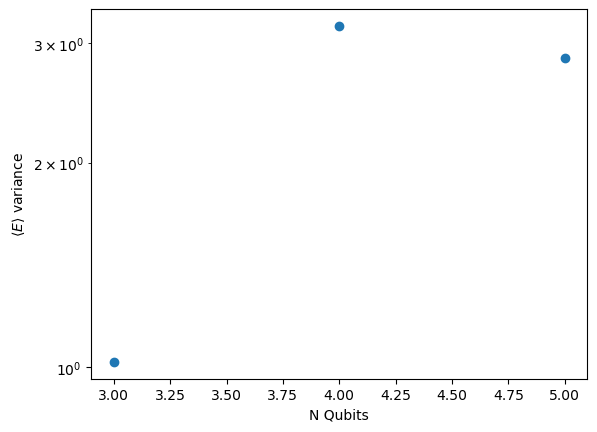

In [7]:
expval_variances = np.array(expval_variances)
qubits = np.array(qubits)

# Fit the semilog plot to a straight line
# p = np.polyfit(qubits, np.log(variances), 1)

# Plot the straight line fit to the semilog
plt.semilogy(qubits, expval_variances, "o")
# plt.semilogy(qubits, np.exp(p[0] * qubits + p[1]), "o-.", label="Slope {:3.2f}".format(p[0]))
plt.xlabel(r"N Qubits")
plt.ylabel(r"$\langle E\rangle$ variance")
# plt.legend()
plt.show()


In [ ]:
# grad_means = []
# grad_variances = []

# for num_q in qubits:
#     fun_vals = []
#     layer = layer_factor * num_q
#     num_p = layer * 2
#     tfim_op = tfim_hamiltonian(num_q, J=-1.0, g=-0.5, bc='periodic')

#     for i in range(num_samples):
#         weights = np.random.uniform(0, 2*np.pi, size=num_p)
#         _, grad = expectation_loss_grad(num_q, 
#                                         layer, 
#                                         weights, 
#                                         circuit=circuit_HVA_TIFM,
#                                         obs=tfim_op,
#                                         output="both",
#                                         spec_param=[0])
#         fun_vals.append(grad)

#     grad_means.append(np.mean(fun_vals))
#     grad_variances.append(np.var(fun_vals))

# print(grad_means)
# print(grad_variances)




[0.2170311036980272, -0.8397840791794309, 0.4892169208821877]
[1.6639941467586024, 8.370010034845308, 8.685317911514883]


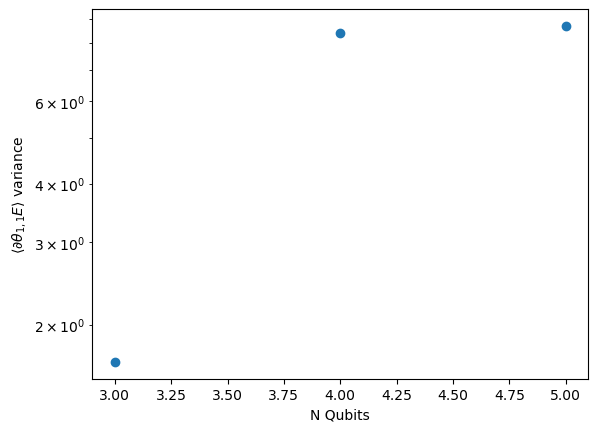

In [ ]:
# grad_variances = np.array(grad_variances)
# qubits = np.array(qubits)

# # Fit the semilog plot to a straight line
# # p = np.polyfit(qubits, np.log(variances), 1)

# # Plot the straight line fit to the semilog
# plt.semilogy(qubits, grad_variances, "o")
# # plt.semilogy(qubits, np.exp(p[0] * qubits + p[1]), "o-.", label="Slope {:3.2f}".format(p[0]))
# plt.xlabel(r"N Qubits")
# plt.ylabel(r"$\langle \partial \theta_{1, 1} E\rangle$ variance")
# # plt.legend()
# plt.show()